In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
print(os.listdir())

['.ai-navigator', '.anaconda', '.conda', '.condarc', '.continuum', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '3D Objects', "AI Jul '25 - 6.ipynb", "AI Jul'25 - 10.ipynb", "AI Jul'25 - 11 (2).ipynb", "AI Jul'25 - 9.ipynb", "AI July'25 - 2.ipynb", "AI July'25 - 4.ipynb", "AI July'25 - 5.ipynb", "AI July'25 1.ipynb", 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'cardio_train_clean.xlsx', 'class.5.ipynb', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'IntelGraphicsProfiles', 'Links', 'list', 'Local Settings', 'MicrosoftEdgeBackups', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{1100b0dc-596e-11f0-af90-80ee739abd8b}.TM.blf', 'NTUSER.DAT{1100b0dc-596e-11f0-af90-80ee739abd8b}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{1100b0dc-596e-11f0-af90-80ee739abd8b}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'pandas_dataset.csv', '

In [4]:
import pandas as pd

# CSV file load
df = pd.read_csv("spotify_tracks.csv")

# First 10 rows print pannudhu
print(df.head(20))


                        id                                           name  \
0   7kr3xZk4yb3YSZ4VFtg2Qt                                       Acoustic   
1   1kJygfS4eoVziBBI93MSYp                                       Acoustic   
2   6lynns69p4zTCRxmmiSY1x                  Here Comes the Sun - Acoustic   
3   1RC9slv335IfLce5vt9KTW                                    Acoustic #3   
4   5o9L8xBuILoVjLECSBi7Vo  My Love Mine All Mine - Acoustic Instrumental   
5   742ZnC1OgUGIScdzXEy5ui                                       Acoustic   
6   3vpJdk93GzerZnlou6Ua0z                    Beautiful Things - Acoustic   
7   42qGA2116mkpSAaxzQfjEf                                      Landslide   
8   0OHHcoyrWnkVukc911UeZd                                       Acoustic   
9   64zEnxASl3epPAIH4MsmSw                     Acoustic Energy Vibrations   
10  1okbqCnEzl9GUddnjNkb19                                    Little Lies   
11  5Ix5RkjIO1r3gL0NH2KpqK                                       Acoustic   

In [6]:
df.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit'],
      dtype='object')

genre
acoustic             50
new-age              50
punk                 50
psych-rock           50
progressive-house    50
power-pop            50
post-dubstep         50
pop-film             50
pop                  50
piano                50
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_776\1647430187.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")


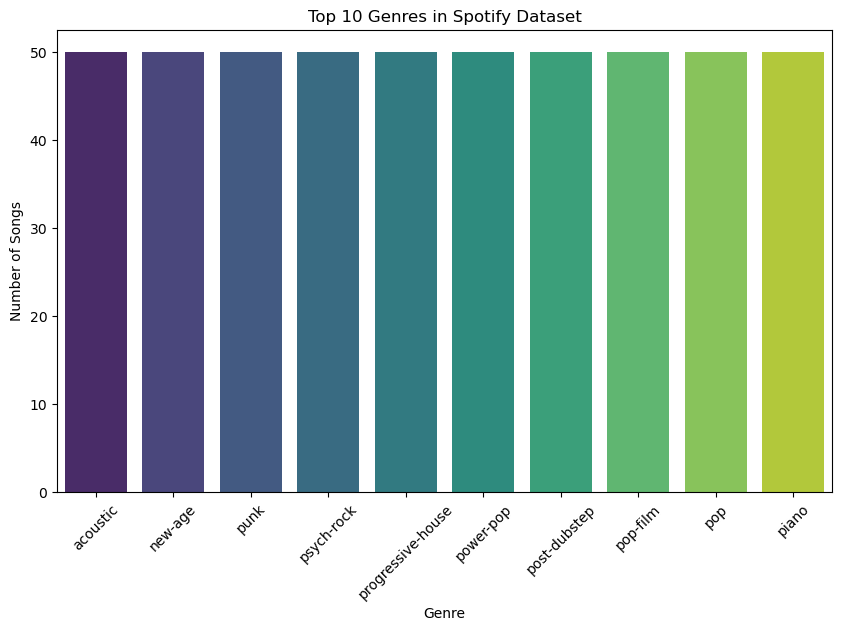

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: CSV File load
df = pd.read_csv("spotify_tracks.csv")

# Step 2: Top 10 genres count
top_genres = df['genre'].value_counts().head(10)
print(top_genres)

# Step 3: Bar chart plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.title("Top 10 Genres in Spotify Dataset")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Numeric columns summary
print(df.describe())

        popularity   duration_ms
count  6300.000000  6.300000e+03
mean     30.754762  2.028477e+05
std      19.948991  1.210299e+05
min       0.000000  3.006000e+04
25%      16.000000  1.476870e+05
50%      29.000000  1.916070e+05
75%      45.000000  2.369625e+05
max      90.000000  3.601658e+06


In [10]:
# Unique genres count
print(df['genre'].value_counts())

genre
acoustic             50
new-age              50
punk                 50
psych-rock           50
progressive-house    50
                     ..
french               50
forro                50
folk                 50
emo                  50
world-music          50
Name: count, Length: 126, dtype: int64


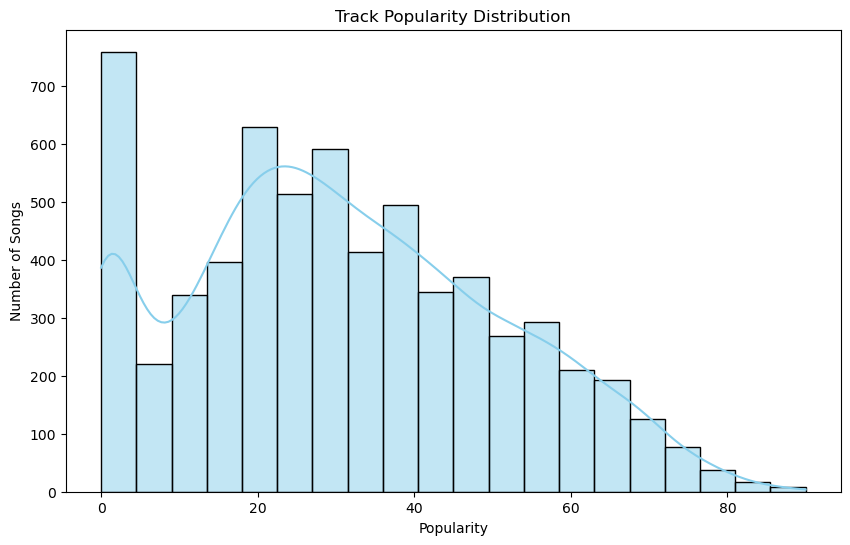

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=20, color='skyblue', kde=True)
plt.title("Track Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.show()

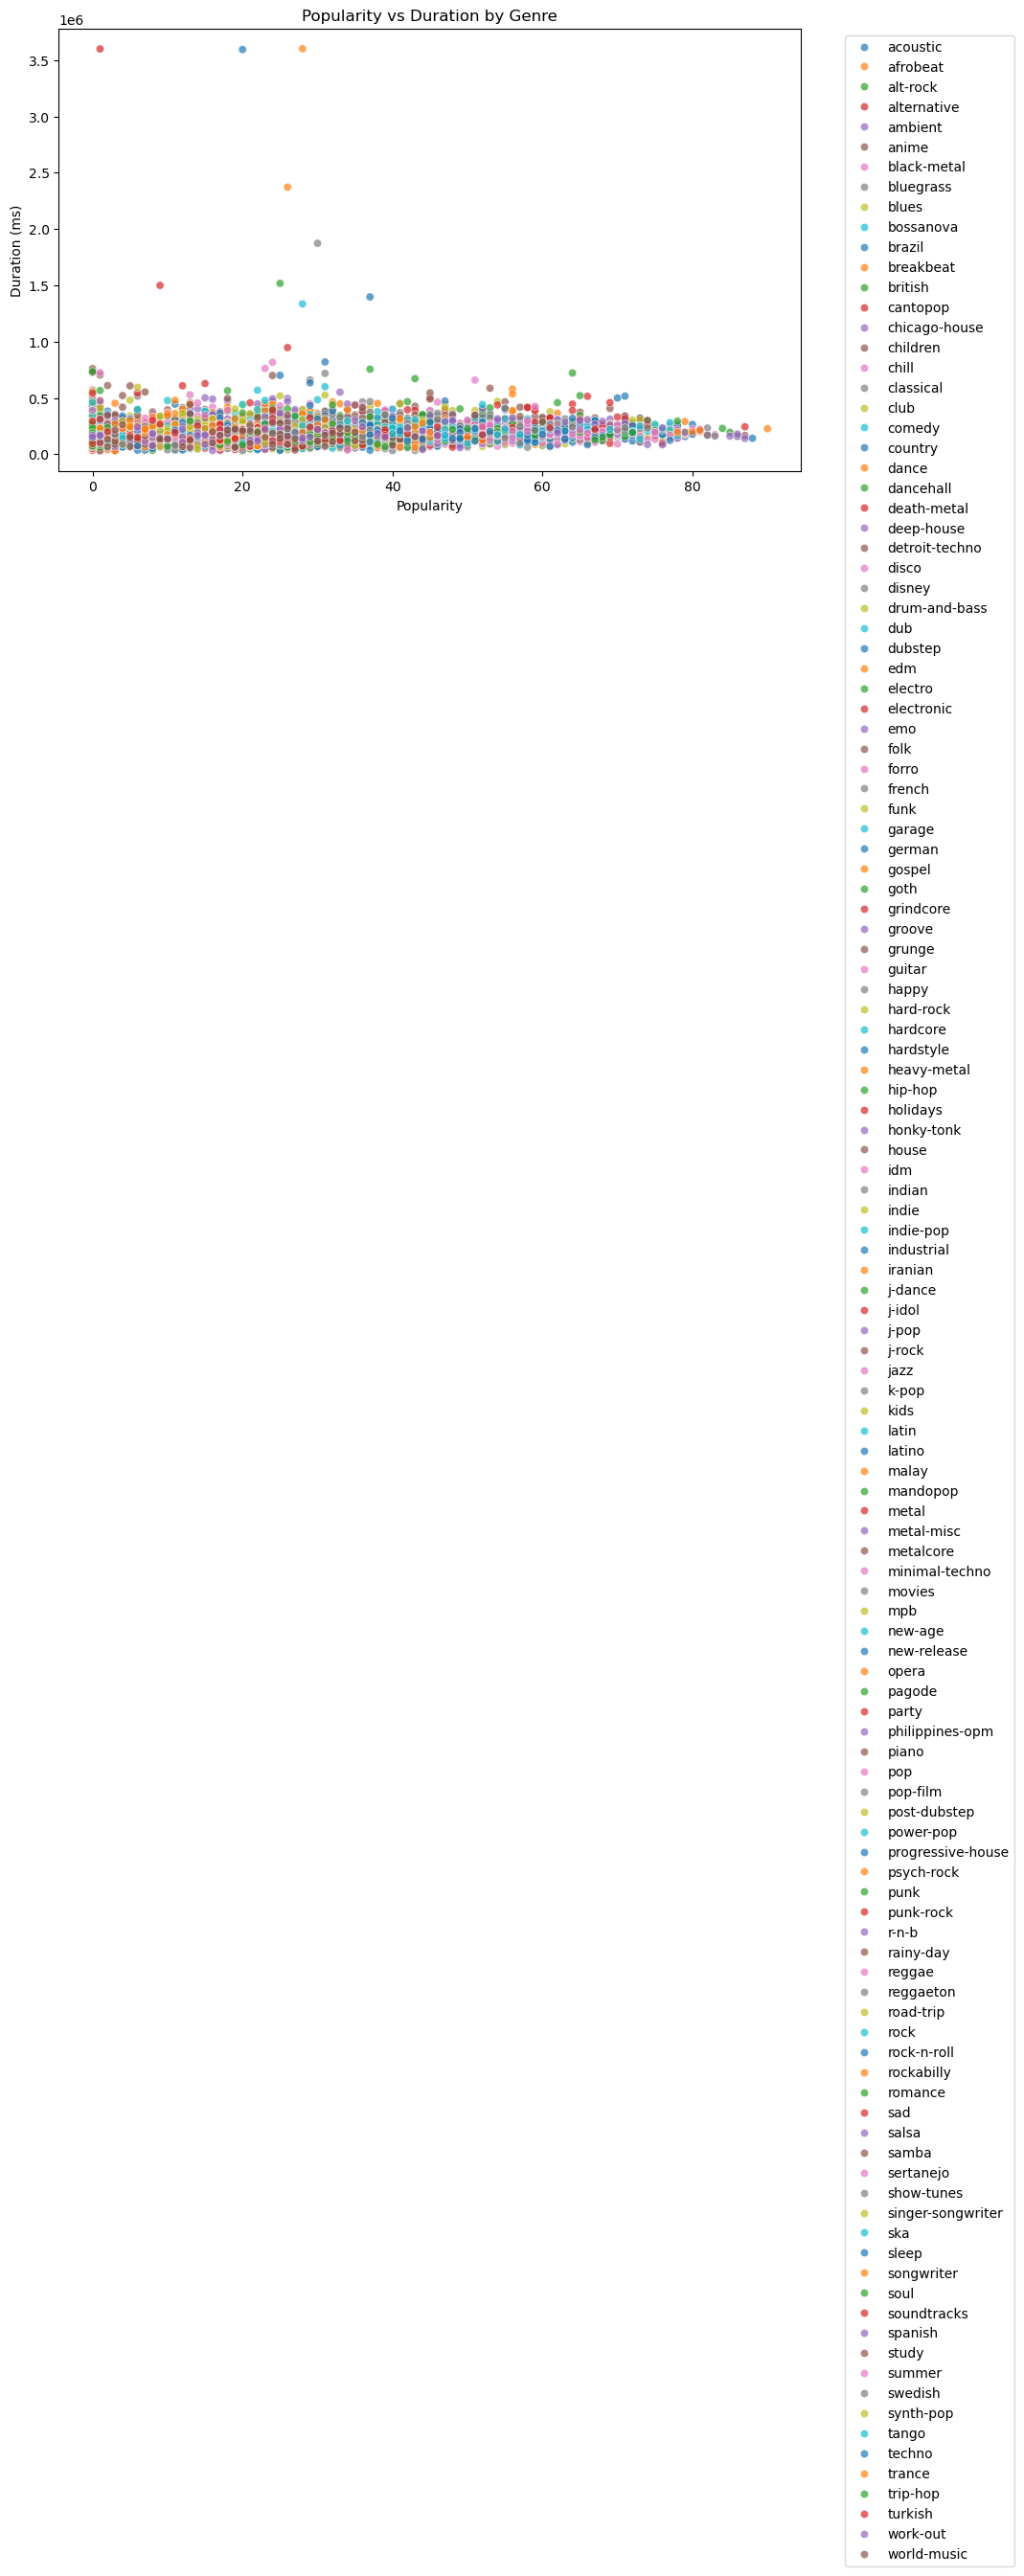

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='popularity',      # irukkura column
    y='duration_ms',     # irukkura column
    hue='genre',         # irukkura column
    palette='tab10',
    alpha=0.7
)
plt.title("Popularity vs Duration by Genre")
plt.xlabel("Popularity")
plt.ylabel("Duration (ms)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Load
df = pd.read_csv("spotify_tracks.csv")

# Step 2: Features & Target
y = df['genre']   # Target column

# Drop unwanted text columns that are not useful for ML
X = df.drop(['genre', 'id', 'name', 'artists', 'album'], axis=1)

# Step 3: Encode categorical columns if any
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Accuracy & Report
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Model Accuracy: 3.49%

Classification Report:

                   precision    recall  f1-score   support

         acoustic       0.00      0.00      0.00        13
         afrobeat       0.00      0.00      0.00        13
         alt-rock       0.10      0.09      0.10        11
      alternative       0.00      0.00      0.00        12
          ambient       0.00      0.00      0.00        12
            anime       0.12      0.08      0.10        12
      black-metal       0.19      0.25      0.21        12
        bluegrass       0.00      0.00      0.00        10
            blues       0.00      0.00      0.00        14
        bossanova       0.00      0.00      0.00        10
           brazil       0.00      0.00      0.00        12
        breakbeat       0.00      0.00      0.00        12
          british       0.00      0.00      0.00         8
         cantopop       0.11      0.12      0.12         8
    chicago-house       0.17      0.18      0.17        11
        

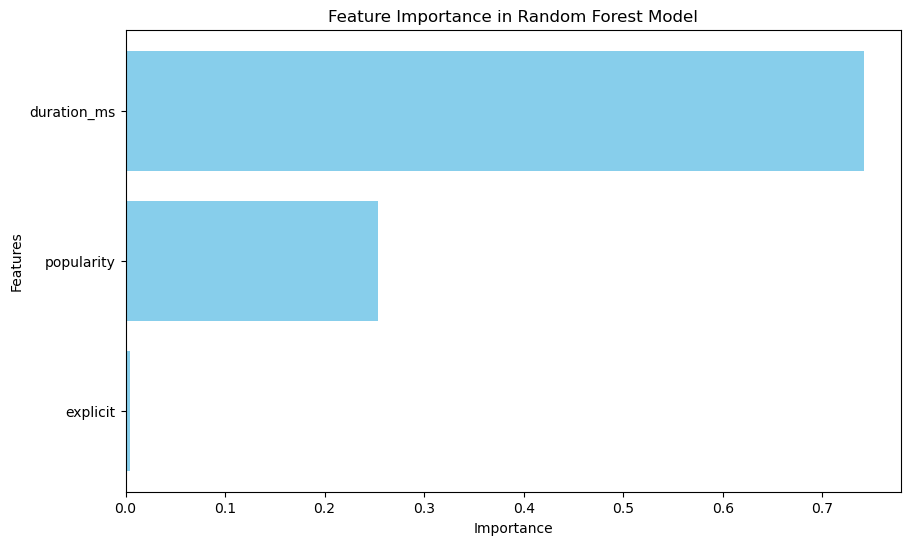

In [26]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Sort importance
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.barh(feature_names[sorted_indices], importances[sorted_indices], color='skyblue')
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Highest importance top la
plt.show()

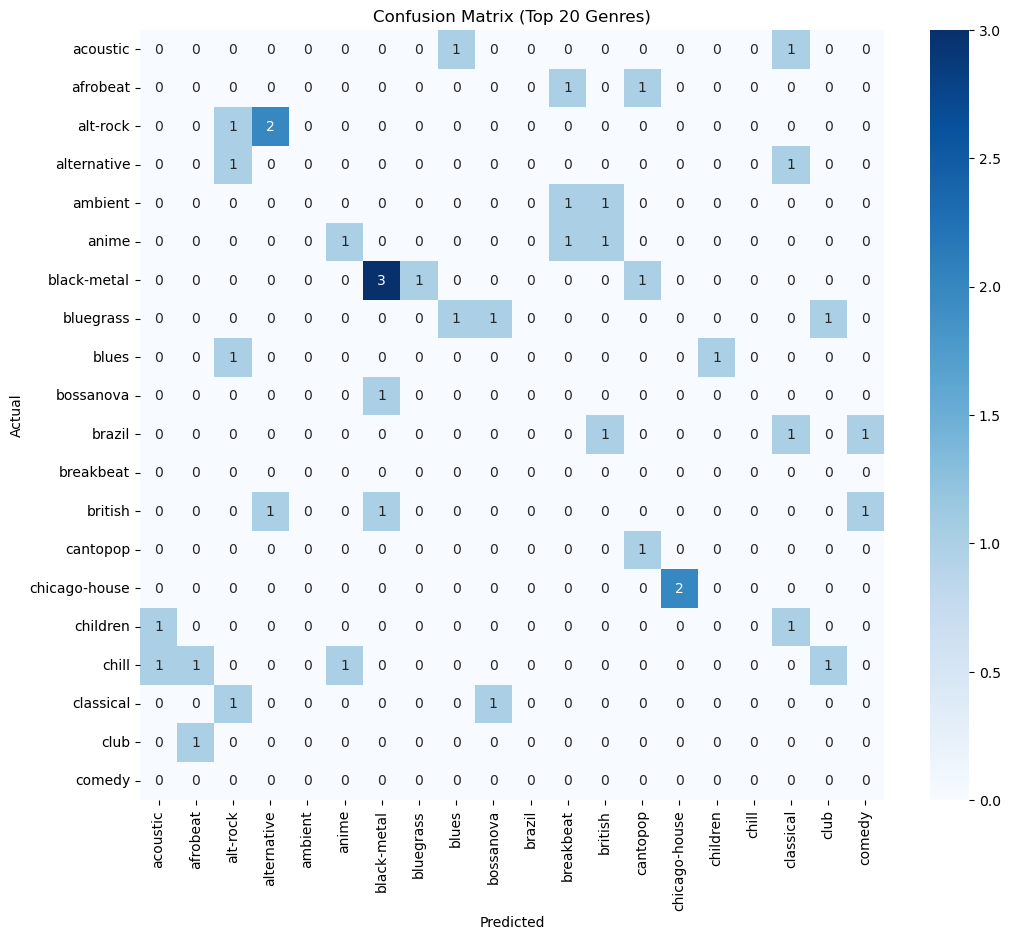

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Top 20 unique labels மட்டும் எடுக்க
labels = model.classes_[:20]

# Top 20 க்கு confusion matrix கணக்கிடு
cm_top20 = confusion_matrix(y_test, y_pred, labels=labels)

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(cm_top20, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Top 20 Genres)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()